https://featuretools.alteryx.com/en/stable/guides/time_series.html

In [65]:
import featuretools as ft
import pandas as pd

In [69]:
def load_weather(nrows=None, return_single_table=False):
    """
    Load the Australian daily-min-temperatures weather dataset.

    Args:

        nrows (int): Passed to nrows in ``pd.read_csv``.
        return_single_table (bool): Exit the function early and return a dataframe.

    """
    filename = "daily-min-temperatures.csv"
    print("Downloading data ...")
    url = "https://api.featurelabs.com/datasets/{}?library=featuretools&version={}".format(
        filename, ft.__version__
    )
    data = pd.read_csv(url, index_col=None, nrows=nrows)
    if return_single_table:
        print('Done')
        return data
    es = make_es(data)
    print('Done')
    return es

def make_es(data):
    es = ft.EntitySet("Weather Data")

    es.entity_from_dataframe(
        dataframe=data,
        entity_id="temperatures",
        index="id",
        make_index=True,
        time_index="Date",
    )
    return es

In [70]:
es = load_weather()

Done


In [71]:
df = load_weather(return_single_table=True)

Done


In [58]:
es['temperatures']

Entity: temperatures
  Variables:
    id (dtype: index)
    Date (dtype: datetime_time_index)
    Temp (dtype: numeric)
  Shape:
    (Rows: 3650, Columns: 3)

In [66]:
type(es['temperatures'])

featuretools.entityset.entity.Entity

<AxesSubplot:ylabel='Temp (C)'>

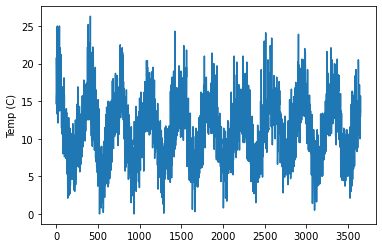

In [74]:
df['Temp'].plot(ylabel='Temp (C)')

In [75]:
split_point = int(df.shape[0]*.7)

training_data = df[:split_point]
test_data = df[split_point:]

In [76]:
gap = 7
window_length = 5

## Time Series Primitives

### Datetime Transform Primitives